<a href="https://colab.research.google.com/github/Koushikgoud/Stock_Price_Prediction-using-DL/blob/main/Advanced_stock_prediction_vLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/Datasets/stocksData2022/"


Mounted at /content/drive


In [ ]:
import time
start_time = time.time()

In [ ]:

df = pd.read_csv(os.path.join(dataset_path, 'RELIANCE_with_indicators_.csv'))

# Select the features you want to use for training
selected_features = ['close', 'sma5', 'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20']



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[selected_features].values)

# Create a separate scaler for the 'close' prices column
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(df['close'].values.reshape(-1, 1))


# Split the data into 80% for training and 20% for testing
train_data_len = int(len(scaled_close) * 0.8)
train_data = scaled_close[0:train_data_len, :]
test_data = scaled_close[train_data_len:, :]


In [ ]:
# Create the training dataset
x_train = []
y_train = []
for i in range(60, train_data_len):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=6)

Epoch 1/6
3257/3257 [==============================] - 651s 198ms/step - loss: 8.5881e-04
Epoch 2/6
3257/3257 [==============================] - 636s 195ms/step - loss: 6.4845e-04
Epoch 3/6
3257/3257 [==============================] - 634s 195ms/step - loss: 6.0687e-04
Epoch 4/6
3257/3257 [==============================] - 641s 197ms/step - loss: 5.6326e-04
Epoch 5/6
3257/3257 [==============================] - 643s 197ms/step - loss: 5.5494e-04
Epoch 6/6
3257/3257 [==============================] - 643s 197ms/step - loss: 5.3206e-04


In [ ]:


# Create the test dataset
x_test = []
y_test = df['close'][train_data_len:].values


epochs = 10, Dropout = 0.5
Epoch 1/10
3257/3257 [==============================] - 595s 181ms/step - loss: 0.0020
Epoch 2/10
3257/3257 [==============================] - 589s 181ms/step - loss: 0.0012
Epoch 3/10
3257/3257 [==============================] - 586s 180ms/step - loss: 0.0012
Epoch 4/10
3257/3257 [==============================] - 584s 179ms/step - loss: 0.0011
Epoch 5/10
3257/3257 [==============================] - 587s 180ms/step - loss: 0.0010
Epoch 6/10
3257/3257 [==============================] - 588s 181ms/step - loss: 0.0010
Epoch 7/10
3257/3257 [==============================] - 591s 181ms/step - loss: 9.6257e-04
Epoch 8/10
3257/3257 [==============================] - 590s 181ms/step - loss: 9.6307e-04
Epoch 9/10
3257/3257 [==============================] - 584s 179ms/step - loss: 9.2772e-04
Epoch 10/10
3257/3257 [==============================] - 592s 182ms/step - loss: 9.1567e-04

In [ ]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

# Convert lists to numpy arrays
x_test = np.array(x_test)


In [ ]:

# Make predictions and inverse transform the values
predictions = model.predict(x_test)

# Inverse transform the predictions using the 'close' scaler
predictions = close_scaler.inverse_transform(predictions)


813/813 [==============================] - 50s 60ms/step


In [ ]:
# Calculate the Mean Absolute Error
min_length = min(len(predictions), len(y_test))

predictions_trimmed = predictions[:min_length]
y_test_trimmed = y_test[:min_length]


Evaluation Metric: We are using Mean Absolute Error (MAE) as the evaluation metric for comparing the predicted stock prices with the actual stock prices. This is a suitable choice because it provides an easy-to-interpret measure of the average error between the predicted and actual values.
We also calculated Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE):



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

predictions_reshaped = predictions_trimmed.reshape(-1)
mae = mean_absolute_error(predictions_reshaped, y_test_trimmed)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_trimmed, predictions_reshaped)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_trimmed - predictions_reshaped) / y_test_trimmed)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 44.84586476467885
Mean Squared Error: 4052.0611517777243
Root Mean Squared Error: 63.655802184700526
Mean Absolute Percentage Error: 1.9264492322298647%


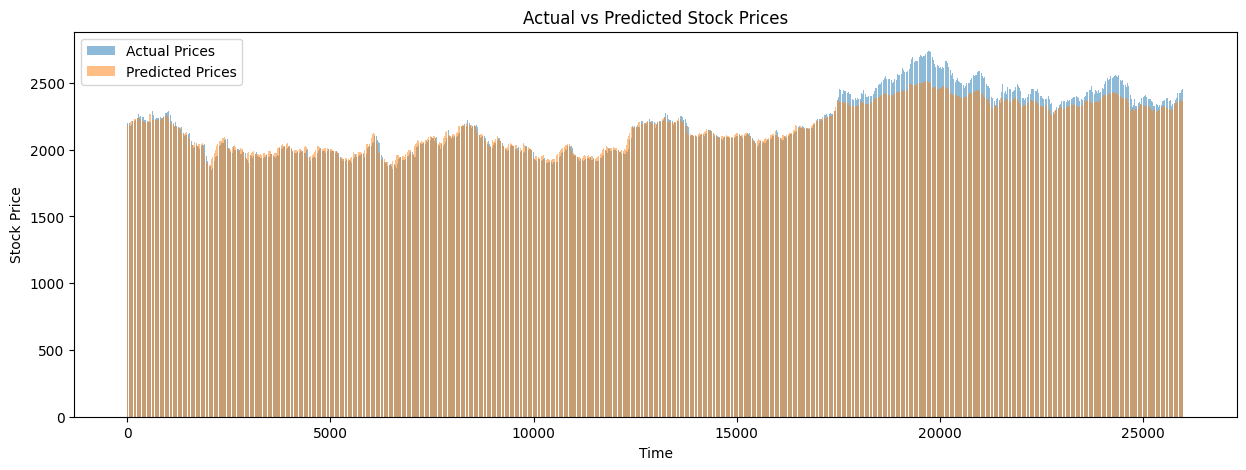

In [ ]:
# Plot the actual and predicted stock prices
index = range(min_length)

plt.figure(figsize=(15, 5))
plt.bar(index, y_test_trimmed, label='Actual Prices', alpha=0.5)
plt.bar(index, predictions_trimmed.reshape(-1), label='Predicted Prices', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

Dataset Size: Our dataset size can be found using the len(df) command. We can report the size of the dataset as well as the sizes of the training and testing sets. In our code, we have used an 80-20 split for training and testing data.

In [ ]:
total_data_size = len(df)
train_data_size = train_data_len
test_data_size = len(df) - train_data_len
print("Total data size: ", total_data_size)
print("Train data size: ", train_data_size)
print("Test data size: ", test_data_size)

Total data size:  130348
Train data size:  104278
Test data size:  26070


In [ ]:
# Get the dates corresponding to the test data
dates_test = df['date'].iloc[-min_length:]

# Create a DataFrame with actual and predicted prices
results_df = pd.DataFrame({'Date': dates_test, 'Actual Prices': y_test_trimmed, 'Predicted Prices': predictions_trimmed.reshape(-1)})
# results_df.set_index('Date', inplace=True)
results_df


,Date,Actual Prices,Predicted Prices
104338,2020-09-25 10:00:00+05:30,2203.70,2190.148193
104339,2020-09-25 10:05:00+05:30,2205.40,2189.497803
104340,2020-09-25 10:10:00+05:30,2204.35,2188.424316
104341,2020-09-25 10:15:00+05:30,2207.40,2187.229004
104342,2020-09-25 10:20:00+05:30,2206.95,2185.948242
...,...,...,...
130343,2022-02-18 15:05:00+05:30,2441.85,2361.073486
130344,2022-02-18 15:10:00+05:30,2441.95,2360.368652
130345,2022-02-18 15:15:00+05:30,2441.15,2359.724854
130346,2022-02-18 15:20:00+05:30,2444.60,2359.166260


In [ ]:
end_time = time.time()
time_taken = end_time - start_time  # Make sure you subtract the start_time from end_time to get the elapsed time
time_taken_hours = time_taken / 3600
results_df["Time Taken for execution in hours"] = time_taken_hours
print("Time taken:", time_taken_hours, "hours")

Time taken: 1.1189746916956371 hours


In [ ]:
!pip install xlsxwriter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# create an Excel writer object
writer = pd.ExcelWriter('advanced_LSTM_model_DropOut_0pnt5_epochs6_RELIANCE_stock_prediction_results.xlsx', engine='xlsxwriter')
results_df.to_excel(writer, index=False, sheet_name="results")
writer.save()


<ipython-input-37-0939f7c29876>:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


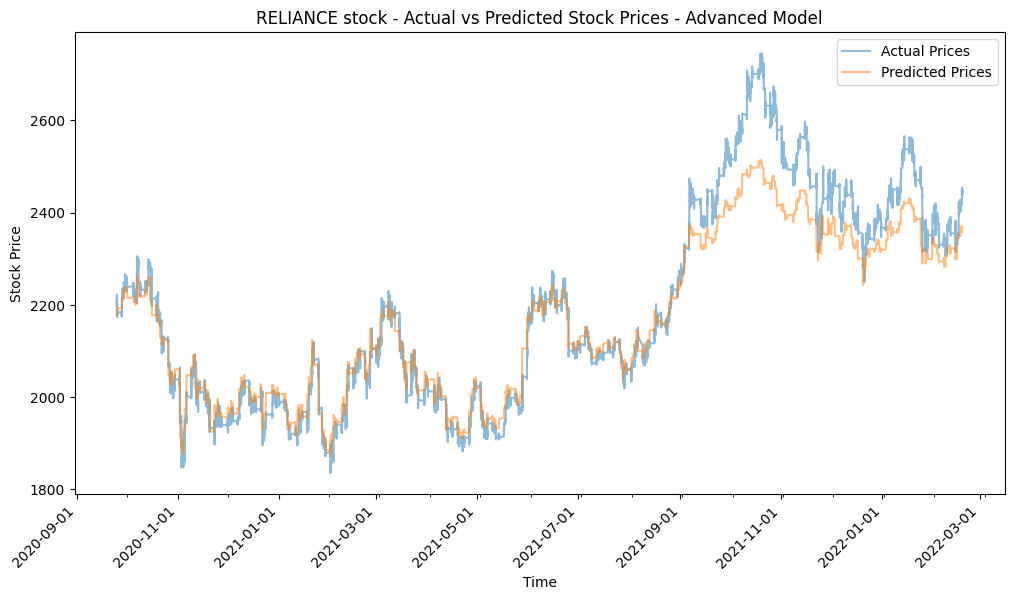

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

# Convert the dates to datetime objects
results_df.index = pd.to_datetime(results_df["Date"])

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the actual prices
ax.plot(results_df.index, results_df['Actual Prices'], label='Actual Prices', alpha=0.5)

# Plot the predicted prices
ax.plot(results_df.index, results_df['Predicted Prices'], label='Predicted Prices', alpha=0.5)

# Format x-axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adjust the value '2' to control the number of minor ticks
plt.xticks(rotation=45, ha='right')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_title('RELIANCE stock - Actual vs Predicted Stock Prices - Advanced Model')
ax.legend()

plt.show()
